In [6]:
#Using Facebook's prophet package to forecast the stock price of PayPal in the coming year
#Based on the Prophet tutorial, which can be found here: https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [7]:
import pandas as pd
from fbprophet import Prophet
import quandl

In [8]:
quandl.ApiConfig.api_key = 'YOUR_API_KEY'

In [9]:
df = quandl.get_table('WIKI/PRICES', ticker = 'PYPL', 
                        qopts = { 'columns': ['date', 'adj_close'] }, 
                        date = { 'gte': '2010-12-31', 'lte': '2018-07-09' }, 
                        paginate=True)
df.head()

,date,adj_close
None,,
0,2015-07-20,40.47
1,2015-07-21,39.35
2,2015-07-22,38.39
3,2015-07-23,37.01
4,2015-07-24,37.00


In [10]:
#Rename columns to 'ds' and 'y', otherwise Prophet will not work
df.rename(columns={'date': 'ds','adj_close':'y'}, inplace=True)
df.head()

,ds,y
None,,
0,2015-07-20,40.47
1,2015-07-21,39.35
2,2015-07-22,38.39
3,2015-07-23,37.01
4,2015-07-24,37.00


In [11]:
#Instantiate new Prophet object and fit model

In [ ]:
m = Prophet()
m.fit(df)

In [13]:
#Create prediction model for 365 future days

In [14]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1037,2019-03-23,116.220649,94.202173,139.871919
1038,2019-03-24,116.151480,94.257828,139.946756
1039,2019-03-25,115.768784,93.910476,139.557619
1040,2019-03-26,115.634938,92.974748,139.620288
1041,2019-03-27,115.727724,93.571259,139.908004


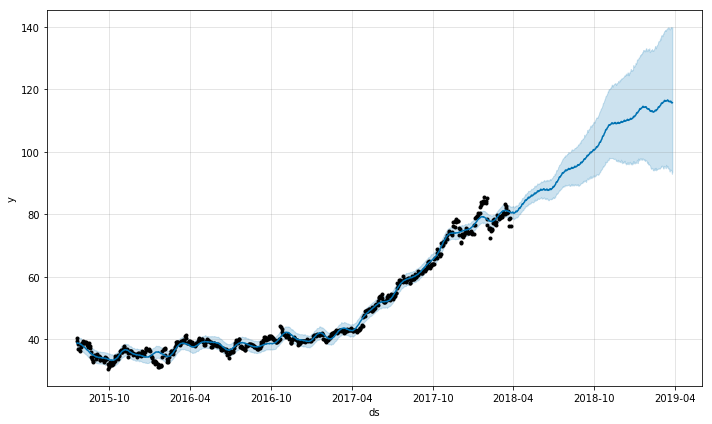

In [15]:
pypl_forecast = m.plot(forecast)

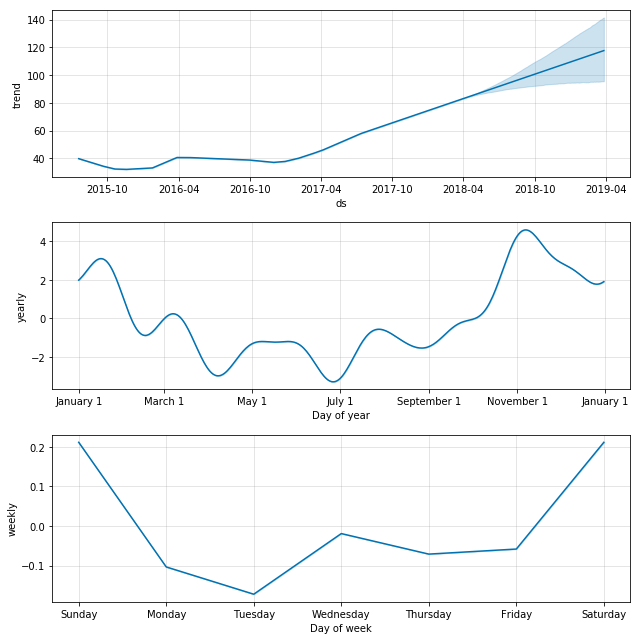

In [16]:
pypl_seasonal = m.plot_components(forecast)